# Data Preprocessing

This notebook documents a thorough coverage of how to preprocess data in Python including dealing with missing data and outliers

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Missing Data

In [5]:
air_df = pd.read_csv('C:/Python_Data_Sets/Airdata.csv')
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,01/01/2020 00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,01/01/2020 01:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,01/01/2020 02:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,01/01/2020 03:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,01/01/2020 04:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43
...,...,...,...,...,...,...,...,...
8779,12/31/2020 19:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82
8780,12/31/2020 20:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31
8781,12/31/2020 21:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33
8782,12/31/2020 22:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70


In [6]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


In the above output, NO2_Location_A,NO2_Location_B and NO2_Location_C all have missing values as they have fewer non - null totals than the other variables. An additional way to determine missing values is to use the below function, which generates exact totals of NA values for each variable.

In [7]:
print('Number of missing values:')
for col in air_df.columns:
    n_MV = sum(air_df[col].isna())
    print('{}:{}'.format(col, n_MV))

Number of missing values:
DateTime:0
Temperature:0
Humidity:0
Wind_Speed:0
Wind_Direction:0
NO2_Location_A:120
NO2_Location_B:580
NO2_Location_C:132


## Diagnosing Missing Values

A variable with missing values has the information of two variables: itself and a hidden attribute. The hidden attribute is a binary variable whose value is one when there is a missing value and zero otherwise. To figure out the type of missing values(MCAR, MAR and MNAR), we need to investigate whether there is a relationship between the hidden binary variable of the atrribute with missing values and the other attributes in the dataset. The following shows the kinds of relationships we would expect to see based on the missing value types.

MCAR: We dont expect the hidden binary variable to have a meaningful relationship with the other attributes\
MAR: We expect a meaningful relationship between the hidden binary variable and at least one of the other attributes\
MNAR: We expect a strong relationship betweenb the hidden binary variable and at least one of the other attributes.

### Diagnosing Missing Values in N02_Location_A

The below code generate boxplots which indicate the range of temperature ranges for missing and non missing values in the above variable

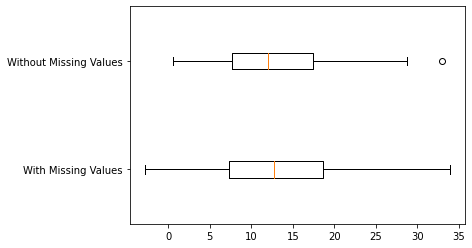

In [8]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['With Missing Values', 'Without Missing Values']

box_sr = pd.Series('', index = BM_MV.unique())

for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = air_df[BM].Temperature
    
plt.boxplot(box_sr,vert = False)
plt.yticks([1, 2], MV_labels)
plt.show()

The above plot indicates that the temperature value range does not meaningfully change between the two populations. This shows that a change in temperature could not have caused or influenced the occurrence of missing values under N02_Location_A. The distribution could be visualised with a histrogram, which the following code achieves

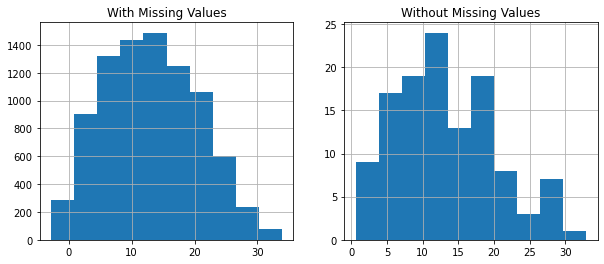

In [9]:
BM_MV = air_df.NO2_Location_A.isna()
temp_range = (air_df.Temperature.min(), air_df.Temperature.max())
MV_labels = ['With Missing Values', 'Without Missing Values']

plt.figure(figsize = (10,4))

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1, 2, i + 1)
    BM = BM_MV == poss
    air_df[BM].Temperature.hist()
    plt.xlim = temp_range
    plt.title(MV_labels[i])

plt.show()

The above plot indicates that the temperature value range does not meaningfully change between the two populations. This shows that a change in temperature could not have caused or influenced the occurrence of missing values under N02_Location_A.

The finding of the two plots can be confirmed using a two sample t-test. This test evaluates whether the value of a numerical attribute is significantly different among the two groups. The two groups here are the data objects having misisng values under the N02_Location_A and and the data objects without missing values under this variable

This test hypothesizes that there is no significant difference between the attributes' value among the two groups and then calculates the probability of the data turning out the way it has if the hypothesis is correct. This probability is called the p-value. So, if the p-value is very small, we have meaningful evidence to suspect the hypothesis of the two sample t-test could be wrong. We can tets hypotheses using the following code

In [10]:
from scipy.stats import ttest_ind
BM_MV = air_df.NO2_Location_A.isna()
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature)

Ttest_indResult(statistic=0.05646499065315542, pvalue=0.9549726689684548)

The p=-value is very large (0.95), which means we do not have any reason to suspect the value of temperature can be meaningfully different between the two groups. This conclusion confirms the findings of the boxplots and histograms.

### Diagnosing missing values based on all the numerical attributes

To complete the diagnosis of missing values, we need to complete an identical analysis as just completed, but for all the attributes. While each part of the analysis is simple to understand and interpret, the fact that the diagnosis has mnay parts begs a very organised way of coding and analysis. The following function produces the boxplots, histograms and t-tests - which can be applied to all the numerical attributes later

In [11]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df, str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values', False:'Without Missing Values'}
    
    labels = []
    box_sr = pd.Series('', index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert = False)
    plt.yticks([1, 2], labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize = (10,4))
    
    att_range = (df[str_att_name].min(), df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1, 2, i + 1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data, group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

The following code runs the previously created function on all the numerical attributes

Diagnosis Analysis of Missing Values for Temperature:


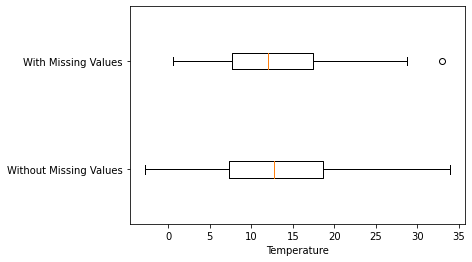

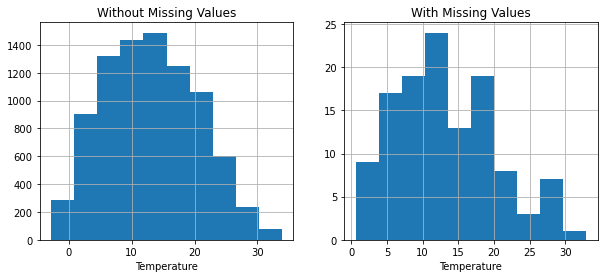

p-value of t-test: 0.9549726689684548
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


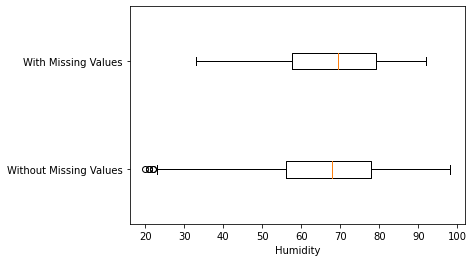

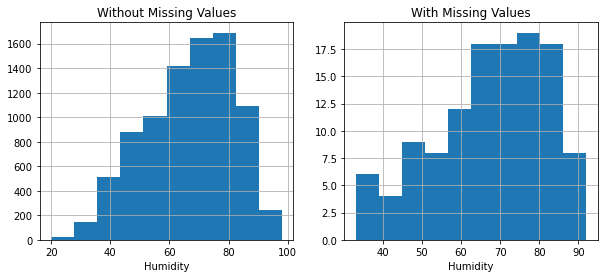

p-value of t-test: 0.5593319830352679
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


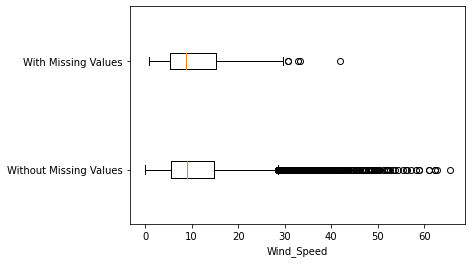

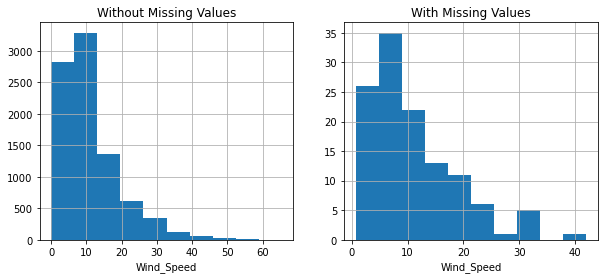

p-value of t-test: 0.8172472856083665
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


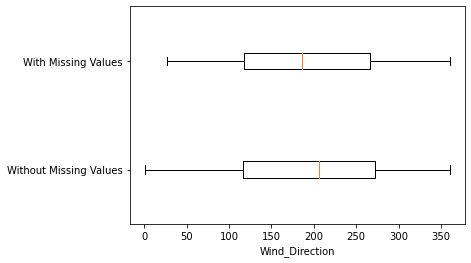

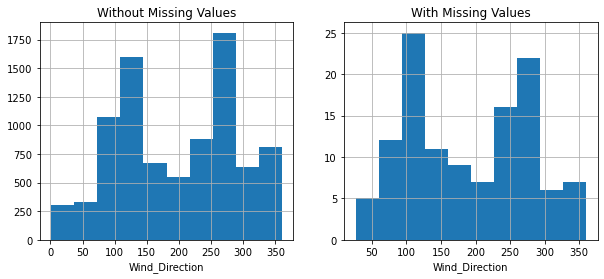

p-value of t-test: 0.39869195396670654
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [12]:
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_A.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df, att, BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

The output above indicates that the tendency of the missing value under N02_Location A does not change based on the values of either numerical attribute in the data. We will next do a similar exercise, but for categorical variables. 

# Diagnosing Missing Data in Categorical Data

### Diagnosing Missing Values based on weekday

The data set does not have a weekday variable, so first, we need to create it. We can unpack the ai_df_DataTime into weekday, day, month and hour

In [13]:
air_df.DateTime = pd.to_datetime(air_df.DateTime)
air_df['month'] = air_df.DateTime.dt.month
air_df['day'] = air_df.DateTime.dt.day
air_df['hour'] = air_df.DateTime.dt.hour
air_df['weekday'] = air_df.DateTime.dt.day_name()

In [14]:
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


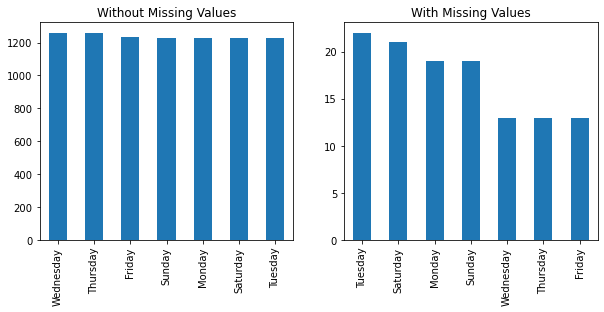

In [15]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['Without Missing Values', 'With Missing Values']

plt.figure(figsize = (10, 4))
for i, poss in enumerate(BM_MV.unique()):
    plt.subplot(1, 2, i + 1)
    BM = BM_MV == poss
    air_df[BM].weekday.value_counts().plot.bar()
    plt.title(MV_labels[i])
plt.show()

The above plot reveals that the missing values could have happened randomly and we dont have a meaningful trend to believe there is a systematic reason for the missing values to have occured due to a change in the value of air_df.weekday. A more statistically sound diagnosis can be done with a chi square test of independence. This test hypothesizes that there is no relationship between the occurence of the missing values and the weekday variable. For this hypothesis, the test calculates the p-value that is the probability of the data happening where the hypothesis is true. The p-value allows us to determine if there is any evidence to suspect a systematic reason for missing values. It is first necessary to construct a contingency table, which the chi square test can be run on. The below code creates the table.

In [18]:
from scipy.stats import chi2_contingency
BM_MV = air_df.NO2_Location_A.isna()
contingency_table = pd.crosstab(BM_MV, air_df.weekday)
contingency_table

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
NO2_Location_A,,,,,,,
False,1235,1229,1227,1229,1259,1226,1259
True,13,19,21,19,13,22,13


In [20]:
chi2_contingency(contingency_table)

(6.048964133655503,
 0.41772751510388023,
 6,
 array([[1230.95081967, 1230.95081967, 1230.95081967, 1230.95081967,
         1254.62295082, 1230.95081967, 1254.62295082],
        [  17.04918033,   17.04918033,   17.04918033,   17.04918033,
           17.37704918,   17.04918033,   17.37704918]]))

The above output indicates that the p-value is 0.4127, which means there is no relationship between the occurence of missing values in ai_df.N02_Location_A and the value of weekday. It is possible that the missing values happened the way they did by pure or random chance.

## Diagosing missing values for all the categorical variables

To complete this diagnosis, we first create a function that performs the two analyses we require, which can be done with the following code:

In [21]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df, str_att_name, BM_MV):
    MV_labels = {True:'With Missing Values', False:'Without Missing Values'}

    plt.figure(figsize = (10, 4))
    for i, poss in enumerate(BM_MV.unique()):
        plt.subplot(1, 2, i + 1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV, df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

With this, we can run it on the data, with the following code:

Diagnosis Analysis of Missing Values for month:


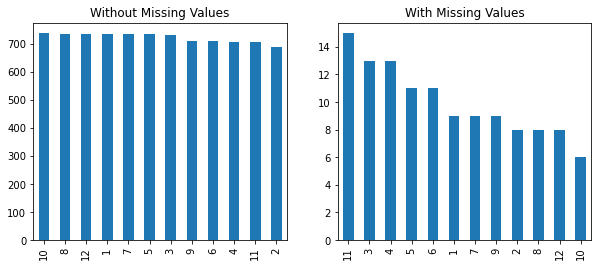

p-value of Chi_squared test: 0.7096565832929861
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


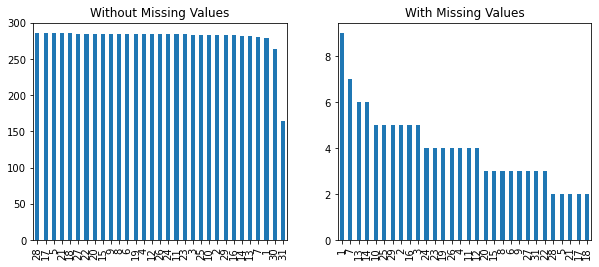

p-value of Chi_squared test: 0.8040640724986007
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


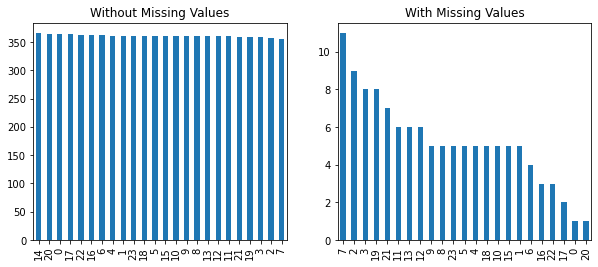

p-value of Chi_squared test: 0.12725321642668141
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


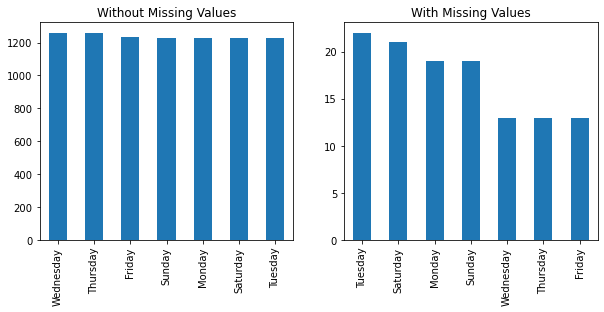

p-value of Chi_squared test: 0.41772751510388023
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [22]:
categorical_attributes = ['month', 'day','hour', 'weekday']

BM_MV = air_df.NO2_Location_A.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df, att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

The above code generates bar chart diagnoses and chi - square independence test diagnoses. The output indicates that the tendency of the missing value under N02_Location_A does not change based on the values of either categorical variable in the data, This means that none of the variables, specifically temperature, humidity, wind_speed, wind_direction, weekday, day, month and hour may have influenced the tendency for missing values. Based on such diagnostic results, we can conclude that missing values in the N02_Location_A are of the MCAR type.

## Diagnosing missing values in N02_Location_B

This process is exactly the same as for N02_Location_A. The code below groups categorical and numerical variables seperately and then determines the NA values. The final for functions apply the numerical and categorical functions to the data to generate outputs for analysis of such variables

Diagnosis Analysis of Missing Values for Temperature:


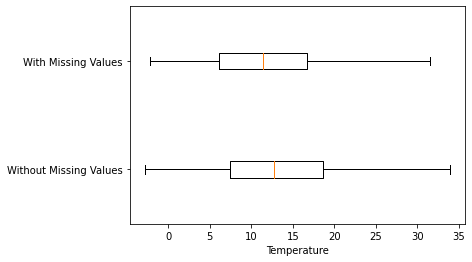

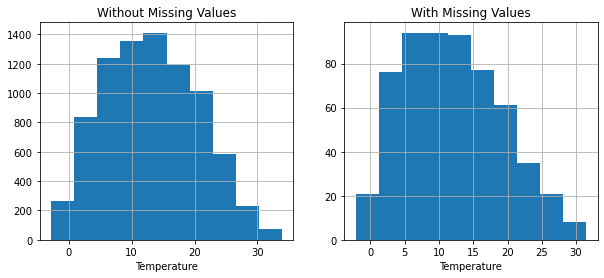

p-value of t-test: 0.00018958810621204928
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


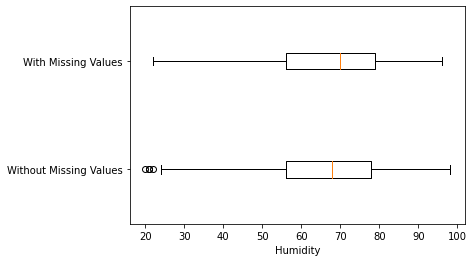

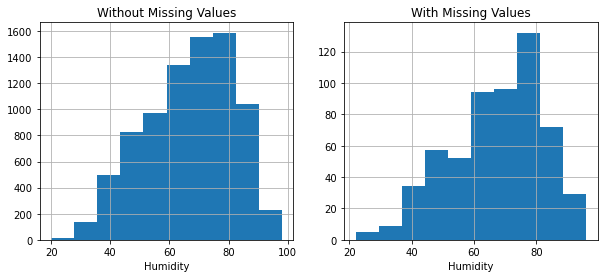

p-value of t-test: 0.43891454332709956
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


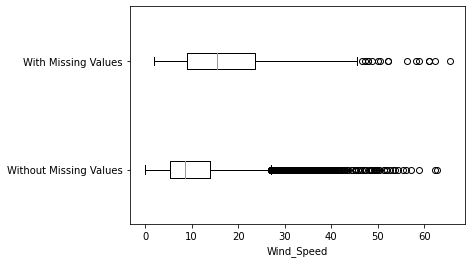

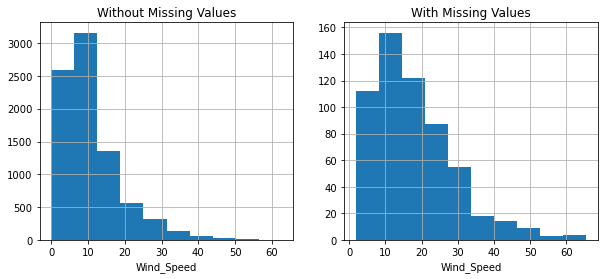

p-value of t-test: 1.3126894108159327e-85
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


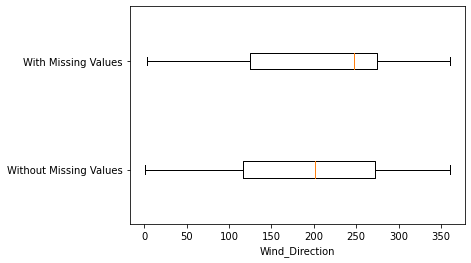

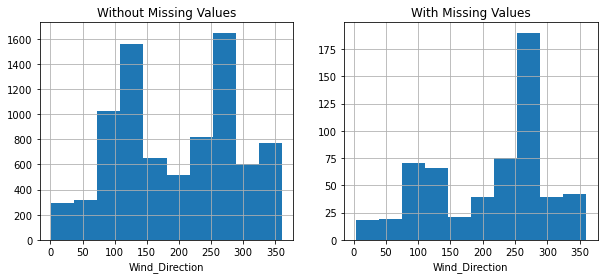

p-value of t-test: 5.8398056632254833e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for month:


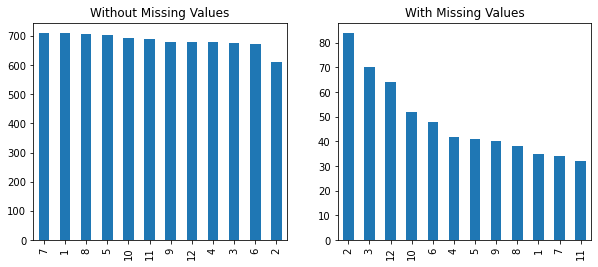

p-value of Chi_squared test: 1.8048364819875927e-10
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


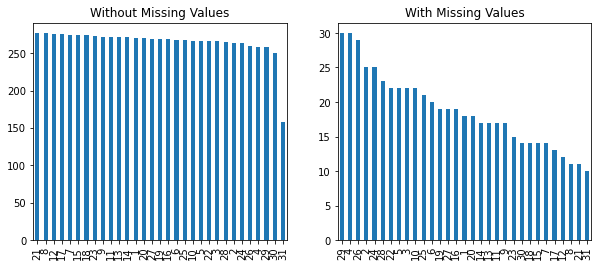

p-value of Chi_squared test: 0.034816691411564224
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


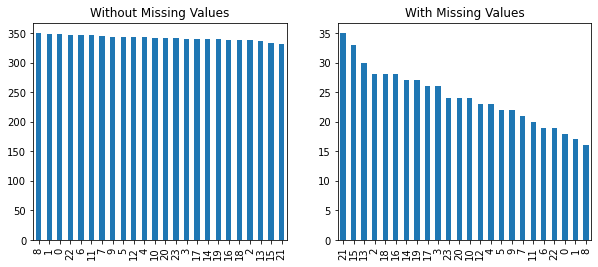

p-value of Chi_squared test: 0.3949474320151337
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


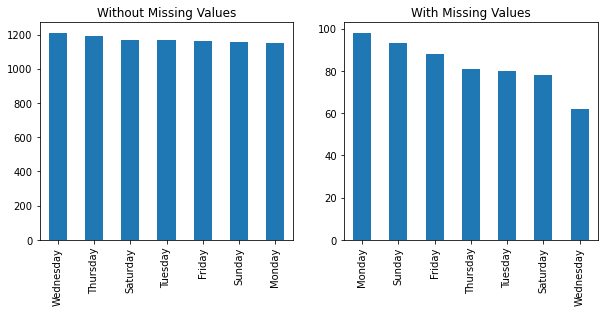

p-value of Chi_squared test: 0.07073083108612685
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [23]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_B.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df, att, BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df, att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

The above report indicates that there is a significant difference in the value of wind_speed between data objects that have missing values in the N02_Location_B and data objects that don't have missing values. In short, a higher wind speed value tends to increase the chance of N02_Location_B having missing values.If we find out that the value of temperature can cause an increase in the occurence of missing values, so we can conclude that the missing values under N02_Location_B are of the MAR type.

## Diagnosing missing values in N02_Location_C

There is only a small alteration needed to the code already used. We just need to change location_B to Location_C

Diagnosis Analysis of Missing Values for Temperature:


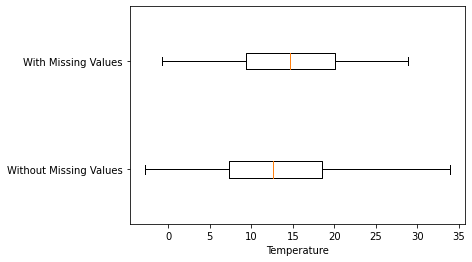

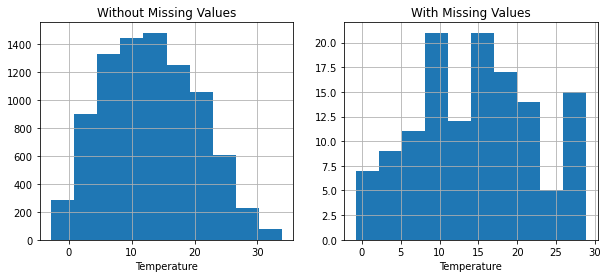

p-value of t-test: 0.01981913552818646
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


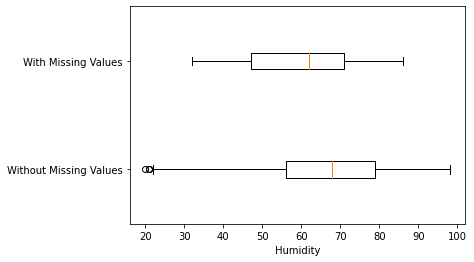

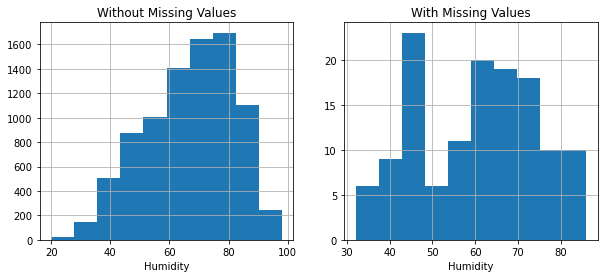

p-value of t-test: 8.179400599849167e-07
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


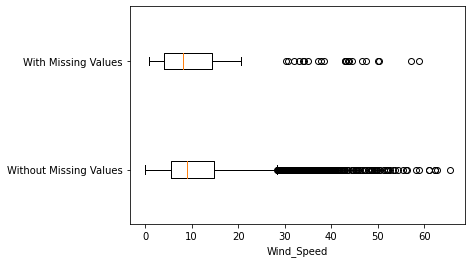

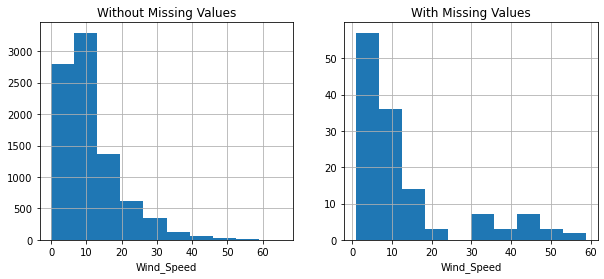

p-value of t-test: 0.01359796253829262
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


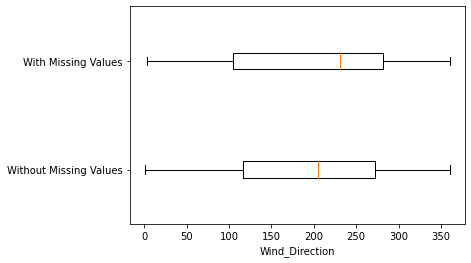

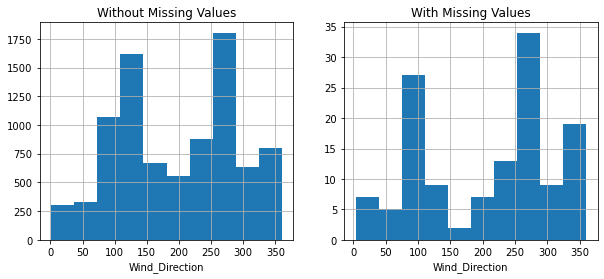

p-value of t-test: 0.3083081973623661
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for month:


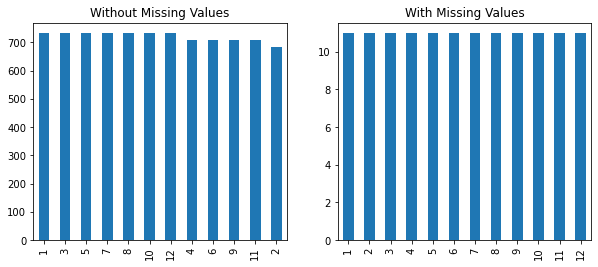

p-value of Chi_squared test: 0.9999999999839941
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


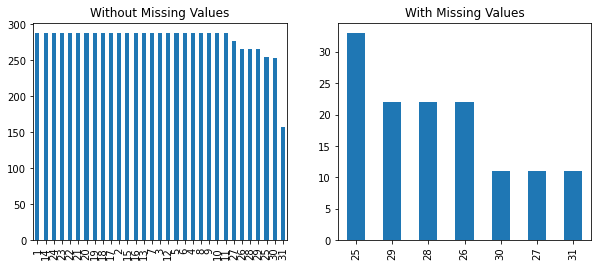

p-value of Chi_squared test: 4.5607973056357013e-101
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


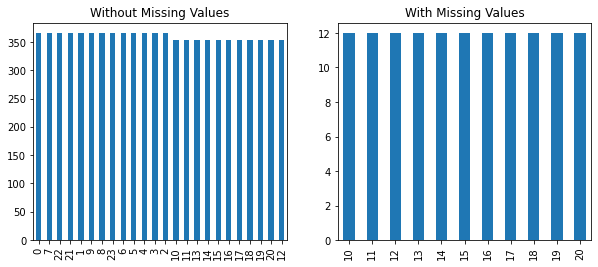

p-value of Chi_squared test: 3.3850851028854862e-22
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


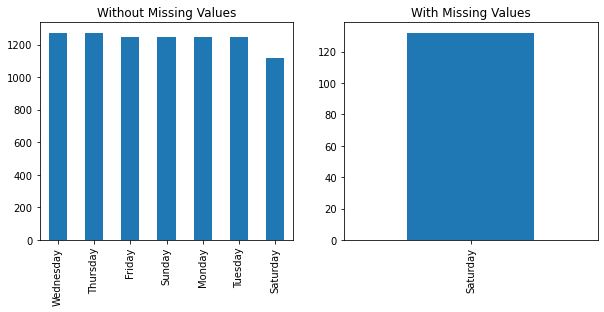

p-value of Chi_squared test: 1.554165460861991e-171
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [24]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_C.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df, att, BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df, att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

The diagnosis report indicates a relationship between the tendency of missing values and most of the variables, specifically, temperature, humidity, wind_speed, day, month, hour and weekday. Yet, the relationship with weekday is the strongest. For weekday, the missing values happen totally all on Saturdays. The p-value is also very small. The diagnosis for hour and day also contain meaningful patterns. The missing values happen equally only when the value of the hour variable is 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 and 20 or when the day attribute is 25, 26, 27, 28 and 29. Therefore, this means that the missing values happen predictably on the last saturday of every month from 10am to 8pm. If we find out that some people were tampering with the sensor for air pollution and so the missing values are MNAR. 

# Dealing with Missing Values

There are four different approaches to deal with missing values:\
    
Keep them as is\
Remove the rows or data objects with missing values\
Remove the attribites or columns with missing values\
Estimate and impute a value

### First Approach - keep the missing data as is

K-Nearest Neighbours can be used as it can be adjusted to deal with missing objects without removing any missing data. However, not every application of KNN has the required modification available to it. For instance, KNN in the sklearn.neighbors module will provide an error is missing values are present. 

### Second Approach - remove data objects with missing values

This is perhaps the least beneficial approach as it potentially introduces bias and removes valuable information. If the missing values are MNAR or MAR, removal of data objects is definitely not a good idea, as it means we are removing a meaningfully distinct part of the dataset. Even where the missing data are MCAR, other approaches are still better. 

### Third Approach - Remove Attributes with missing values

When the number of missing values for any variable is 25% or more of the entire variable, then it is best to simply remove that particular variable or variables. If the missing values are MCAR or MAR and the chosen analytic or method cannpt proceed with missing values, then imputing may be the best approach. 

### Fourth Approach - Estimate and impute missing values

There are four general means to impute values\:

Impute with central tendency (mean, mode and median). This is better for MCAR values\
Impute with central tendency of a more relevant group of data to the missing values. This is better for MAR missing values\
Regression analysis. Not ideal, but if we have to proceed with a dataset that has MNAR missing values, this method is better for such a dataset\
Interpolation. When the data set is time series, and the missing values are of the MCAR type.    

## Choose the right approach to deal with missing values

Where the missing data is not MNAR, and are MCAR, it is best to keep the missing data as is. Therefore, one way to do is to aggregate and take the mean values of data - which can be carried out in Python with the groupby() and mean() functions and can be visualised in a bar chart. When data is aggregated, and the number of missing values is not significant, the aggregation of the data handles the missing values without imputation. Additionally, the mean() function ignores the existence of attributes with missing values and calculates the mean based on data objects or rows that have a value. If we have data that is MNAR, but it is not essential to our analytic goals, we can employ the keep as is strategy.

If we are dealing with MCAR missing values and we have times series data, we require interpolation. this can be achieved with the following code block. In the code, the method = linear function imputes the average of the data points before and after it.

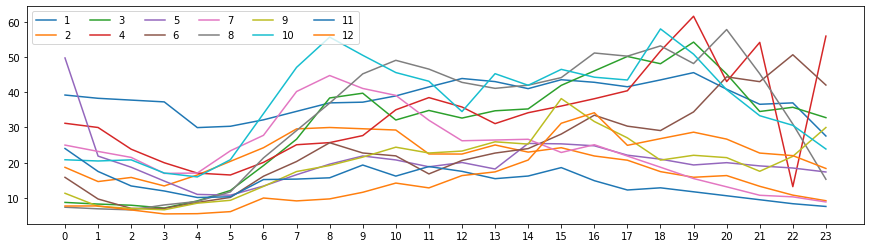

In [25]:
NO2_Location_A_noMV = air_df.NO2_Location_A.interpolate(method = 'linear')

month_poss = air_df.month.unique()
hour_poss = air_df.hour.unique()
plt.figure(figsize = (15, 4))

for mn in month_poss:
    BM = (air_df.month == mn) & (air_df.day == 1)
    plt.plot(NO2_Location_A_noMV[BM].values,
             label = mn)
plt.legend(ncol = 6)
plt.xticks(hour_poss)
plt.show()

In [26]:
patient_df = pd.read_csv('C:/Python_Data_Sets/kidney_disease.csv')

In [27]:
print('Number of missing values:')
for col in patient_df.columns:
    n_MV = sum(patient_df[col].isna())
    print('{}:{}'.format(col, n_MV))

Number of missing values:
rc:131
sc:17
pcv:71
sg:47
hemo:52
diagnosis:0


# Missing Data in a Kidney Disease Dataset

When the number of missing values per variable is high (more than 15%), it is perhaps the reality that most missing values happend for the same data objects or rows, which causes problems for the analysis. We can use the below code block to visualise the distribution of missing rows in the data

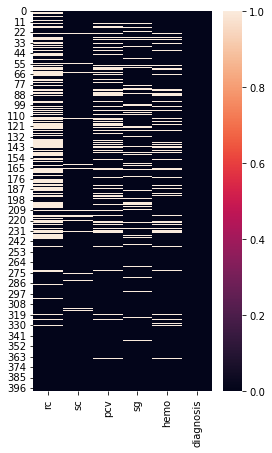

In [28]:
plt.figure(figsize = (4, 7))
sns.heatmap(patient_df.isna())
plt.show()

The above heatmap indicates that the missing values are spread across the rows and it is certainly not true that the missing values under different columns are only from certain rows.

## Diagosing missing values for all the variables

Diagnosis Analysis for sc:


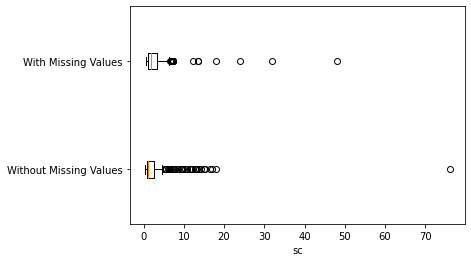

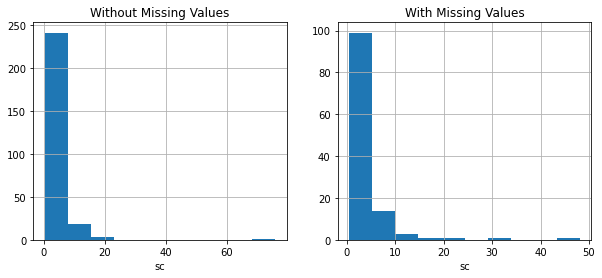

p-value of t-test: 0.18583257224831443
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


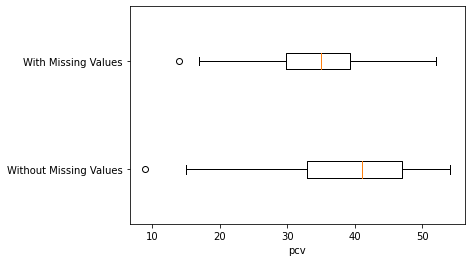

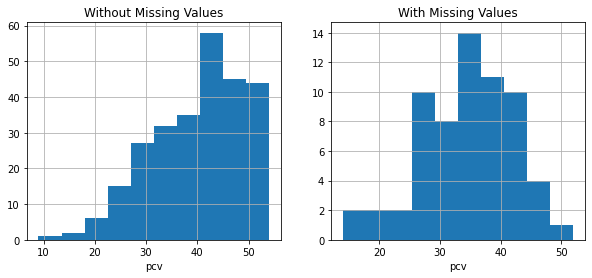

p-value of t-test: 1.552273251165168e-05
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


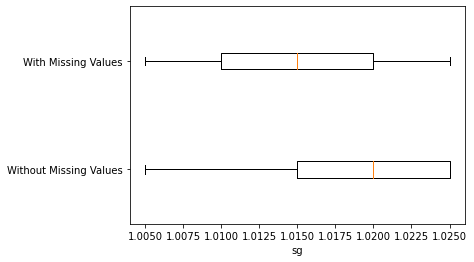

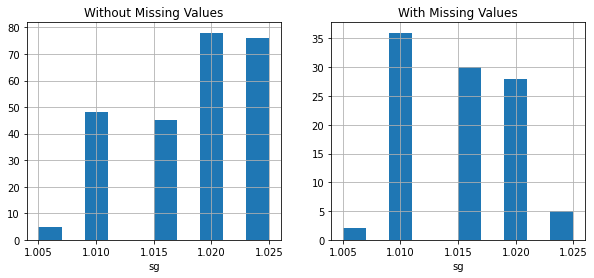

p-value of t-test: 1.0955628827436889e-07
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


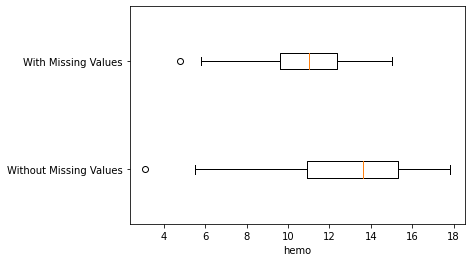

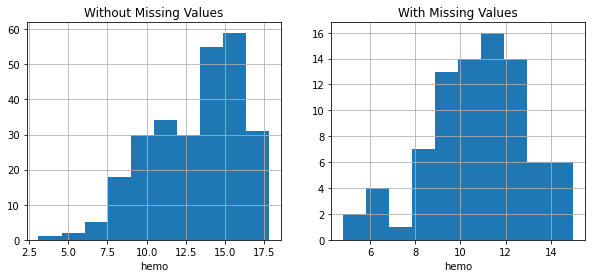

p-value of t-test: 2.9763626466020214e-10
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


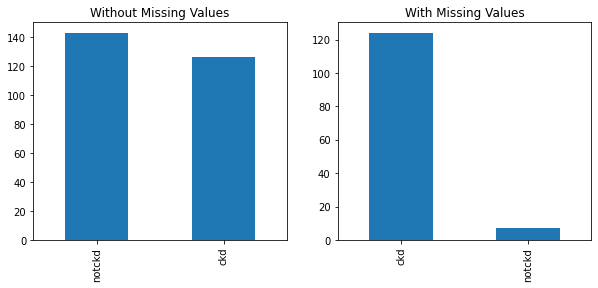

p-value of Chi_squared test: 5.168131718514657e-20
- - - - - - - - - divider - - - - - - - - - 


In [29]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['sc', 'pcv', 'sg', 'hemo']

BM_MV = patient_df.rc.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df, att, BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df, att, BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

The above code generates bar chart diagnoses and chi - square independence test diagnoses. The output indicates that the tendency of the missing value under N02_Location_A does not change based on the values of either categorical variable in the data, This means that none of the variables, specifically temperature, humidity, wind_speed, wind_direction, weekday, day, month and hour may have influenced the tendency for missing values. Based on such diagnostic results, we can conclude that missing values in the N02_Location_A are of the MCAR type.

# Outliers

## Detecting Outliers

### Univariate Outlier detection

In [30]:
column_df = pd.read_csv('C:/Python_Data_Sets/columns.csv')

In [32]:
response_df = pd.read_csv('C:/Python_Data_Sets/Responses.csv')

response_df.head(2)

#### Example of detecting outliers across one numerical attribute

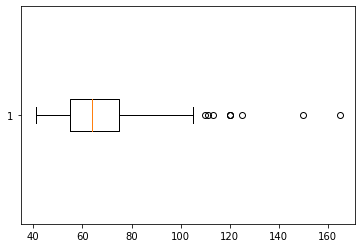

In [33]:
fig = plt.boxplot(response_df.Weight.dropna(), vert = False)

In [ ]:
We can that in the above plot, data points with a value of at least 105 are outliers, so we can select these using the below code

In [34]:
response_df[response_df.Weight > 105]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


In [35]:
print(fig)

{'whiskers': [<matplotlib.lines.Line2D object at 0x00000205196384F0>, <matplotlib.lines.Line2D object at 0x0000020519639AE0>], 'caps': [<matplotlib.lines.Line2D object at 0x00000205196395A0>, <matplotlib.lines.Line2D object at 0x0000020519639330>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002051963AD10>], 'medians': [<matplotlib.lines.Line2D object at 0x000002051963B880>], 'fliers': [<matplotlib.lines.Line2D object at 0x000002051963B280>], 'means': []}


Another way of listing the outliers is to use the following code:

In [36]:
fig['fliers'][0].get_data()

(array([120., 110., 111., 120., 113., 125., 165., 120., 150.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

Univariate outliers can also be identified using the Inter Quartile Range. Any data values that are not within the IQR are outliers. The below code block indicates how outliers can be identified in this manner

In [37]:
Q1 = response_df.Weight.quantile(0.25)
Q3 = response_df.Weight.quantile(0.75)
IQR = Q3 - Q1

BM = (response_df.Weight > (Q3 + 1.5 * IQR)) | (response_df.Weight < (Q1 - 1.5 * IQR))
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


#### Example of detecting outliers across one categorical attribute

This can be completed by using a bar chart or a frequency table. The below table indicates that doctorate degree education is an outlier

In [38]:
response_df.Education.value_counts()

secondary school                    621
college/bachelor degree             212
masters degree                       81
primary school                       80
currently a primary school pupil     10
doctorate degree                      5
Name: Education, dtype: int64

<AxesSubplot:>

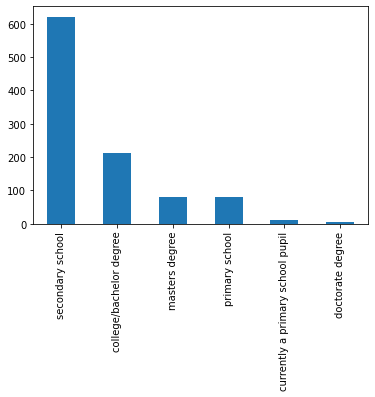

In [39]:
response_df.Education.value_counts().plot.bar()

### Bivariate Outlier detection

This type of outlier detection requires two variables and it is where the combination of values across the two variables are significantly different than the rest, which makes the outliers. For numerical-numerical variables, it is best to use a scatter plot; for numerical-categorical variables, multiple box plots are advised and for categorical-categorical, a color coded contingency table works best

#### Example of detecting outliers across two numerical attributes

<AxesSubplot:xlabel='Height', ylabel='Weight'>

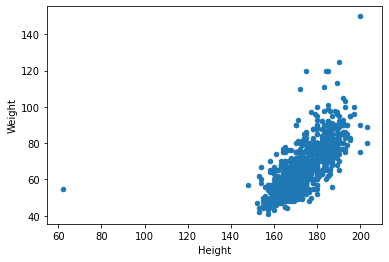

In [40]:
response_df.plot.scatter(x = 'Height', y = 'Weight')

Based on the preceeding scatterplot, there are two outliers, one with a weight value larger than 120 and one height value smaller than 70. It is possible to select these using the below code block

In [41]:
BM = (response_df.Weight > 130) | (response_df.Height < 70)
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


### Example of detecting outliers across two categorical attributes

Here, we want to detect outliers across two categorical variables, namely response_df.Education and response_df.God. It is best to use a contingency table to identify outliers, which can be achieved using crosstab and also a heatmap. The below code block constructs the contingency table

In [42]:
pd.crosstab(response_df['Education'], response_df['God']) 

God,1.0,2.0,3.0,4.0,5.0
Education,,,,,
college/bachelor degree,48,17,46,42,58
currently a primary school pupil,0,1,2,1,6
doctorate degree,1,1,1,0,2
masters degree,8,3,20,15,35
primary school,12,11,21,15,21
secondary school,118,89,126,92,195


In [ ]:
The below code creates the heatmap

<AxesSubplot:xlabel='God', ylabel='Education'>

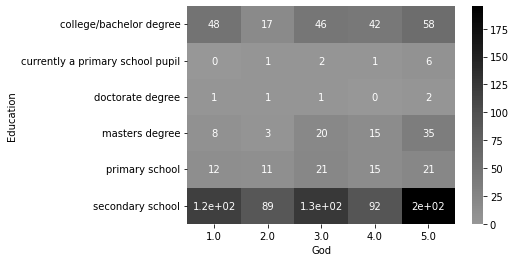

In [43]:
cont_table = pd.crosstab(response_df['Education'], response_df['God'])
sns.heatmap(cont_table, annot = True, center = 0.5, cmap = "Greys")

In the above code, the cells where the count is one, represent outliers and so, we can remove them, which can be completed in the below code steps. When we know the row numbers, which are evident below, we can remove these rows.

In [53]:
response_df.query('Education == "currently a primary school pupil" & God == 2')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
950,5.0,3.0,2.0,3.0,NaN,4.0,2.0,4.0,5.0,5.0,...,15.0,190.0,85.0,0.0,male,left handed,currently a primary school pupil,yes,village,house/bungalow


In [54]:
response_df.query('Education == "currently a primary school pupil" & God == 4')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
158,5.0,3.0,4.0,2.0,1.0,3.0,2.0,5.0,4.0,1.0,...,15.0,160.0,48.0,2.0,female,right handed,currently a primary school pupil,no,village,block of flats


In [55]:
response_df.query('Education == "doctorate degree" & God == 1')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
668,5.0,3.0,1.0,2.0,3.0,4.0,2.0,2.0,5.0,5.0,...,27.0,186.0,82.0,1.0,male,left handed,doctorate degree,yes,city,house/bungalow


In [56]:
response_df.query('Education == "doctorate degree" & God == 2')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow


In [57]:
response_df.query('Education == "doctorate degree" & God == 3')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow


### Example of detecting outliers across two attributes one categorical and the other numerical

Here, it is important to use multiple box plots, as completed with the following code block.

<AxesSubplot:xlabel='Age', ylabel='Education'>

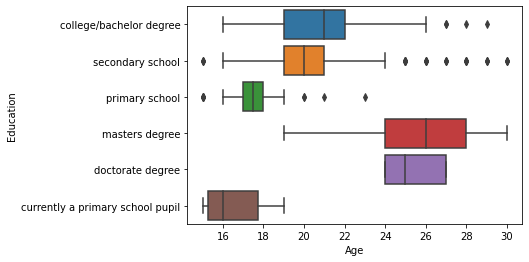

In [44]:
sns.boxplot(x = response_df.Age, y = response_df.Education)

As evident, there are several outliers, which can be filtered in the below code and then they need removing.

In [58]:
BM1 = (response_df.Education == 'college/bachelor degree') & (response_df.Age > 26)
BM2 = (response_df.Education == 'secondary school') & ((response_df.Age > 24) | (response_df.Age < 16))
BM3 = (response_df.Education == 'primary school') & ((response_df.Age > 19) | (response_df.Age < 16))
BM = BM1 | BM2 | BM3
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
30,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,...,25.0,183.0,87.0,1.0,male,right handed,secondary school,no,city,block of flats
40,4.0,3.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,...,26.0,172.0,62.0,1.0,female,right handed,secondary school,no,city,block of flats
49,5.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,3.0,...,20.0,157.0,41.0,1.0,female,right handed,primary school,no,city,block of flats
72,5.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,...,28.0,168.0,52.0,1.0,female,right handed,secondary school,no,city,block of flats
128,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,...,15.0,173.0,49.0,3.0,female,left handed,primary school,no,city,house/bungalow
132,5.0,4.0,3.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,...,15.0,170.0,51.0,1.0,female,right handed,primary school,no,village,house/bungalow
167,3.0,3.0,3.0,2.0,2.0,NaN,2.0,3.0,4.0,3.0,...,21.0,183.0,98.0,1.0,male,right handed,primary school,no,village,house/bungalow
174,5.0,2.0,1.0,5.0,3.0,3.0,3.0,1.0,1.0,1.0,...,26.0,183.0,78.0,0.0,male,right handed,secondary school,yes,city,house/bungalow
202,5.0,3.0,5.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,...,15.0,181.0,63.0,0.0,male,right handed,primary school,yes,city,block of flats
215,1.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,27.0,180.0,80.0,2.0,male,right handed,secondary school,no,city,block of flats


## Multivariate Outlier detection

Example of detecting outliers across four attributes using clustering analysis, as this is the best means when dealing with multiple variables. We would like to see whether we have outliers when using four variables, namely country, metal or hardrock, folk and musical. If K-Means groups one data row or small number of rows, then the chances are, that these data points are outliers. A weakness with K-Means is that the user is required to set the number of clusters. To reduce the potential for bias here, the user can specify a range of clusters for the K-Means to work with, for instance, 2,3,4,5,6,7. This can be done via several steps, the first of which is below

In [59]:
dimensions = ['Country', 'Metal or Hardrock', 'Folk', 'Musical']
Xs = response_df[dimensions]

In [60]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1005 non-null   float64
 1   Metal or Hardrock  1007 non-null   float64
 2   Folk               1005 non-null   float64
 3   Musical            1008 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


It is then important to check for missing values, which the below heatmap reveals

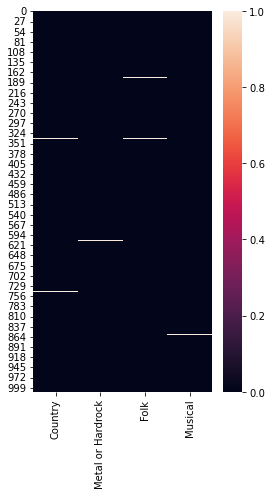

In [48]:
plt.figure(figsize = (4, 7))
sns.heatmap(Xs.isna())
plt.show()

We can process these missing values with an IQR, as set out in the below code

In [63]:
Q3 = Xs.quantile(0.75)
Q1 = Xs.quantile(0.25)
IQR = Q3 - Q1
Xs = Xs.fillna(Q3 + IQR * 1.5)

The next stage is to normalise the data, which can be achieved through the following

In [65]:
Xs = (Xs - Xs.min()) / (Xs.max() - Xs.min())

The code below actually produces the clustering. None of the clusters contain a single or few data rows, so we are not dealing with multivariate outliers.

In [66]:
from sklearn.cluster import KMeans
for k in range(2, 8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(Xs)
    print('k={}'.format(k))
    for i in range(k):
        BM = kmeans.labels_== i
        print('Cluster {}: {}'.format(i, Xs[BM].index.values))
    print('--------- Divider ----------')

k=2
Cluster 0: [   0    3    4    6    7    9   10   11   13   14   16   17   22   23
   25   27   28   29   30   31   33   35   36   38   40   43   44   45
   47   48   50   53   56   57   58   60   61   63   64   67   69   70
   71   72   73   74   76   77   78   79   80   81   87   88   90   92
   94   95   97   98   99  102  103  106  110  111  112  113  114  115
  116  117  118  119  121  122  126  129  131  132  133  134  136  137
  138  139  140  142  143  144  145  148  149  152  153  155  156  158
  162  163  164  165  168  170  171  173  174  179  183  184  185  186
  187  188  191  192  194  195  197  199  202  207  208  211  212  213
  215  217  218  219  220  223  225  228  229  230  232  237  238  239
  240  241  242  243  244  246  247  250  251  252  253  254  256  259
  261  262  263  265  266  268  273  274  278  279  282  283  284  285
  286  287  288  289  290  292  294  296  297  298  299  302  304  305
  306  308  309  310  311  313  315  316  317  318  319  321  

# Dealing with Outliers

### Detecting univariate outliers and dealing with them

First, it is neccesary to ensure that the data we use is free from missing values. We select the data first

In [69]:
select_attributes = ['Weight', 'Height', 'Gender']
pre_process_df = pd.DataFrame(response_df[select_attributes])
pre_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  990 non-null    float64
 1   Height  990 non-null    float64
 2   Gender  1004 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.8+ KB


Then the missing values can be removed with the following code

In [71]:
pre_process_df.dropna(inplace = True)

The visualisation plots below indicate the presence of outliers

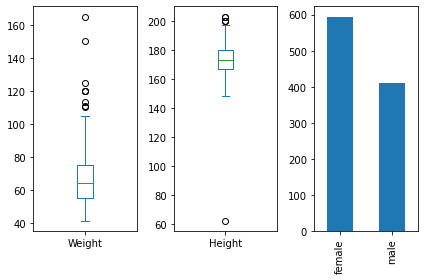

In [70]:
num_attributes = ['Weight', 'Height']
for i, att in enumerate(num_attributes):
    plt.subplot(1, 3, i + 1)
    pre_process_df[att].plot.box()

plt.subplot(1, 3, 3)
pre_process_df.Gender.value_counts().plot.bar()
plt.tight_layout()
plt.show()

The above plots indicate that weight and height have outliers, but gender does not. So, these outliers can either be removed or we can replace them with their statistical upper or lower cap. To replace with these caps, this can be completed with the below code. In this code, only an upper cap calculation has been done as there are only outliers above the upper cap for weight - as indicated by the above plot

In [72]:
Q3 = pre_process_df.Weight.quantile(0.75)
Q1 = pre_process_df.Weight.quantile(0.25)
IQR = Q3 - Q1

upper_cap = Q3 + IQR * 1.5

BM = pre_process_df.Weight > upper_cap
pre_process_df.loc[pre_process_df[BM].index, 'Weight'] = upper_cap

To check outliers have been removed in the weight variable, one option is to produce a box plot, as the following code shows

<AxesSubplot:>

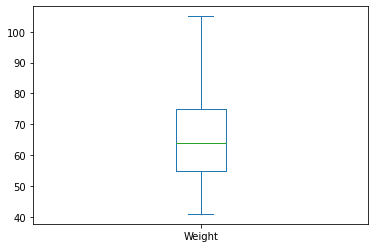

In [73]:
pre_process_df.Weight.plot.box()

The following code removes the outliers for the height variable, which as we know, there are outliers above and below the upper and lower caps. 

In [74]:
Q3 = pre_process_df.Height.quantile(0.75)
Q1 = pre_process_df.Height.quantile(0.25)
IQR = Q3 - Q1

lower_cap = Q1-IQR*1.5
upper_cap = Q3+IQR*1.5

BM = pre_process_df.Height < lower_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = lower_cap

BM = pre_process_df.Height > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = upper_cap

We can determine that there are no remaining outliers with the following box plot

<AxesSubplot:>

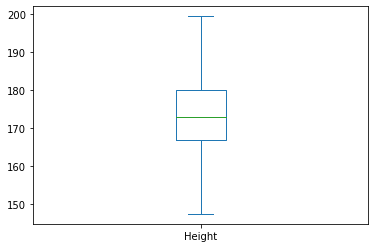

In [75]:
pre_process_df.Height.plot.box()

## Detecing Bi-Variate Outliers and how to deal with them

If we run the following code, it indicates the outliers between height and gender and weight and gender

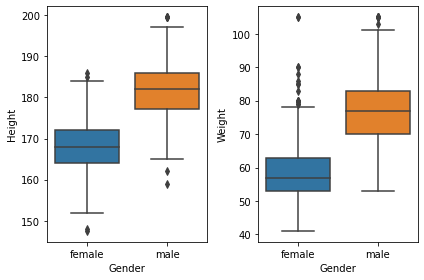

In [77]:
plt.subplot(1, 2, 1)
sns.boxplot(y = pre_process_df.Height, x = pre_process_df.Gender)
plt.subplot(1, 2, 2)
sns.boxplot(y = pre_process_df.Weight, x = pre_process_df.Gender)
plt.tight_layout()

The clear outliers in the height - gender variables can be dealt with in the following code block

In [78]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Height.quantile(0.75)
    Q1 = wdf.Height.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1 - IQR * 1.5
    upper_cap = Q3 + IQR * 1.5
    
    BM = wdf.Height > upper_cap
    pre_process_df.loc[wdf[BM].index, 'Height'] = upper_cap
    
    BM = wdf.Height < lower_cap
    pre_process_df.loc[wdf[BM].index, 'Height'] = lower_cap

The clear outliers in the weight - gender variables can be dealt with in the following code block

In [79]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Weight.quantile(0.75)
    Q1 = wdf.Weight.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1 - IQR * 1.5
    upper_cap = Q3 + IQR * 1.5
    
    BM = wdf.Weight > upper_cap
    pre_process_df.loc[wdf[BM].index, 'Weight'] = upper_cap
    
    BM = wdf.Weight < lower_cap
    pre_process_df.loc[wdf[BM].index, 'Weight'] = lower_cap

We can check that all outliers have been removed in the following box plots

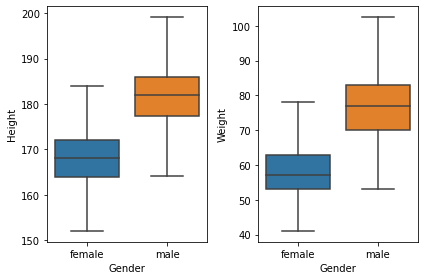

In [80]:
plt.subplot(1, 2, 1)
sns.boxplot(y = pre_process_df.Height, x = pre_process_df.Gender)
plt.subplot(1, 2, 2)
sns.boxplot(y = pre_process_df.Weight, x = pre_process_df.Gender)
plt.tight_layout()

## Detecting multiariate Outliers and how to deal with them

The usual method to detect multivariate outliers is to use clustering. However, if two of the three variables are numerical and the other is categorical, then a specific visualisation technique is more relevant. The following creates a scatterplot of height and weight for each category of gender. 

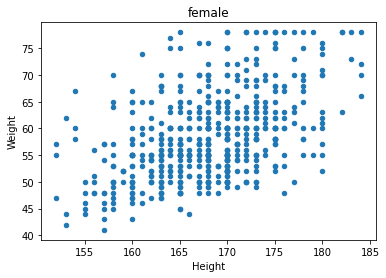

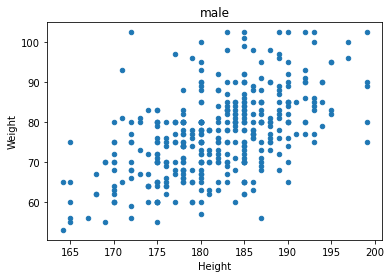

In [81]:
cat_attribute_poss = pre_process_df.Gender.unique()
for i, poss in enumerate(cat_attribute_poss):
    BM = pre_process_df.Gender == poss
    pre_process_df[BM].plot.scatter(x = 'Height', y = 'Weight')
    plt.title(poss)
    plt.show()

The above plots reveal no multivariate outliers